In [2]:
# usual imports

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

# Metropolis-Hastings

In [3]:
def log_pi(x): # log of target density
  return -0.5 * x**2

def metropolis(x, sig=0.1):
  """ Random walk Metropolis step. 
  """
  y = x + sig * np.random.randn()  # random walk proposal 
  log_r = log_pi(y) - log_pi(x)
  if np.log(np.random.rand()) < log_r:  # if u < r
    return y
  else:
    return x 

In [4]:
# generate chain
N = 1000
x = np.empty(N)
x[0] = 100.
for n in range(1, N):
  x[n] = metropolis(x[n-1], sig=2.)


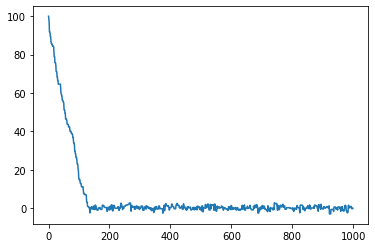

In [5]:
from matplotlib import pyplot as plt
plt.plot(x)
# MCMC trace 

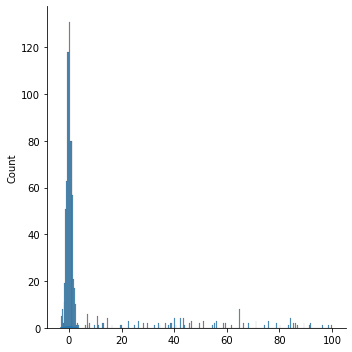

In [6]:
import seaborn as sb
from scipy import stats

sb.displot(x)
xx = np.linspace(-3., 3., 100)
plt.plot(xx, stats.norm.pdf(xx))

# Gibbs sampling (on a bivariate Gaussian, with strongly correlated components)

Recall that, if $X \sim N_2(0, \Sigma)$, with 
$$\Sigma = 
\begin{pmatrix} 
1 & \rho  \\
\rho & 1 
\end{pmatrix}$$
then the conditional distribution of component $X_2$ given $X_1=x_1$ is 
$$N(\rho x_1, 1-\rho^2)$$
(and same expression for $X_1$ given $X_2$).

In [7]:
N = 1000
y = np.empty((N, 2))
y[0, :] = 10.  # starting point

In [8]:
def update(x, rho=0.6):
  return stats.norm.rvs(loc=rho * x, scale=np.sqrt(1. - rho**2))  # N(rho x, 1 - rho^2)

for n in range(N):
  y[n, 0] = update(y[n-1, 1])
  y[n, 1] = update(y[n, 0])

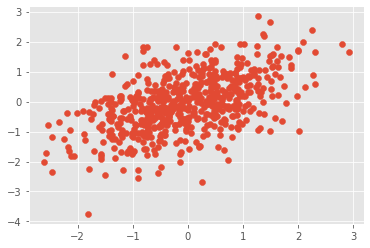

In [9]:
plt.style.use('ggplot')
burn = 400  # burn-in period
plt.scatter(y[burn:, 0], y[burn:, 1], marker='o')

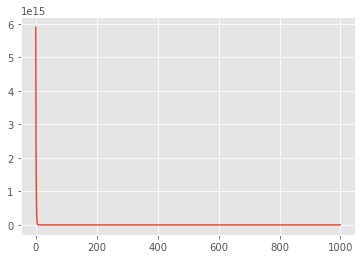

In [10]:
plt.plot(y[:, 0])